In [1]:
import numpy as np
import pandas as pd
import pylab
%matplotlib inline

In [30]:
length = 5
csize = 10
p = 1
###
df = pd.read_csv('sizeDistri_eq_7_9.txt', sep='\t', header=None)
df.columns = ['NSIM', 'NSIM2', 'NSUMO', 'LSIM', 'LSIM2', 'LSUMO', 'beta', 'gamma', 'step', 'sumoSizes', 'simSizes']
df.reset_index(inplace=True)
ratio_in_cluster = []
cluster_size = []
for idx in range(len(df)):
    distri = df.loc[idx].sumoSizes
    sizes = distri.split('[')[1].split(']')[0].split(' ')
    sizes = filter(None, sizes)
    sizes = pylab.array([int(ele) for ele in sizes])
    simdistri = df.loc[idx].simSizes
    simsizes = simdistri.split('[')[1].split(']')[0].split(' ')
    simsizes = filter(None, simsizes)
    simsizes = pylab.array([int(ele) for ele in simsizes])
    combine = np.column_stack((sizes, simsizes))
    ratio_in_cluster.append(sum(sizes[sizes>10])/float(sum(sizes)))
    cluster_size.append(sum(np.square(sizes))/(df.loc[idx].NSUMO*df.loc[idx].LSUMO))
df['RatioInCluster'] = ratio_in_cluster
df['ClusterSize'] = cluster_size



,index,NSIM,NSIM2,NSUMO,LSIM,LSIM2,LSUMO,beta,gamma,step,sumoSizes,simSizes,RatioInCluster,ClusterSize
0,0,107,0,93,7,4,8,0.00,0.0,0,sumoSIZES: [2 1 1 1 2 1 1 1 1 1 1 1 2 1 3 2 1...,simSIZES: [1 0 1 1 1 1 1 1 1 2 1 0 2 0 3 2 0 ...,0.000000,0.184140
1,1,107,0,93,7,4,8,0.80,0.1,100,sumoSIZES: [3 11 2 3 2 1 3 2 1 1 1 1 1 3 2 9 ...,simSIZES: [3 10 3 2 1 2 4 2 1 1 1 1 1 3 2 10 ...,0.118280,0.493280
2,2,107,0,93,7,4,8,0.84,0.1,101,sumoSIZES: [1 2 1 10 4 5 2 12 2 2 3 2 8 2 3 1...,simSIZES: [1 3 0 12 6 6 3 14 1 2 4 2 7 2 3 2 ...,0.129032,0.600806
3,3,107,0,93,7,4,8,0.88,0.1,102,sumoSIZES: [4 3 5 1 6 1 3 2 1 4 1 3 3 1 1 2 8...,simSIZES: [5 3 3 2 8 0 2 2 1 6 2 3 3 2 1 1 7 ...,0.000000,0.407258
4,4,107,0,93,7,4,8,0.92,0.1,103,sumoSIZES: [6 2 1 1 10 1 2 1 9 3 6 3 5 1 1 1 ...,simSIZES: [7 3 1 2 12 1 1 1 11 4 6 3 4 1 1 1 ...,0.000000,0.514785
5,5,107,0,93,7,4,8,0.96,0.1,104,sumoSIZES: [2 17 3 7 1 2 6 1 2 10 2 1 1 3 1 3...,simSIZES: [3 23 4 7 0 2 6 1 2 11 3 1 2 2 1 3 ...,0.182796,0.845430
6,6,107,0,93,7,4,8,1.00,0.1,105,sumoSIZES: [3 4 5 1 7 1 10 2 2 3 1 6 1 3 2 6 ...,simSIZES: [2 4 7 1 8 1 11 2 1 4 1 7 1 3 2 7 3...,0.000000,0.525538
7,7,107,0,93,7,4,8,1.04,0.1,106,sumoSIZES: [1 1 6 8 5 5 4 1 1 1 1 4 1 5 1 6 3...,simSIZES: [0 1 6 8 5 5 3 1 1 1 1 5 1 7 1 6 4 ...,0.000000,0.458333
8,8,107,0,93,7,4,8,1.08,0.1,107,sumoSIZES: [4 1 4 12 14 3 1 2 3 1 1 2 1 2 1 2...,simSIZES: [5 1 5 12 13 4 1 2 3 2 1 1 1 2 1 2 ...,0.279570,0.665323
9,9,107,0,93,7,4,8,1.12,0.1,108,sumoSIZES: [1 1 2 7 2 1 7 6 2 5 2 3 1 1 2 2 1...,simSIZES: [1 1 2 9 3 1 6 7 2 6 2 4 1 0 2 2 1 ...,0.000000,0.436828


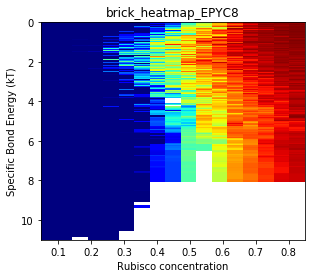

In [40]:
ddf = df[df.LSIM==8]


meanval = ddf.groupby(['NSIM', 'beta'])['RatioInCluster'].mean()
meandata = pd.DataFrame(meanval.to_frame().to_records())
cnt = ddf.groupby(['NSIM', 'beta'])['RatioInCluster'].count()
cntdata = ddf.groupby(['NSIM', 'beta'])['RatioInCluster'].count()

ddf = meanval.to_frame()
ddc = cntdata.to_frame()
ddf['Count'] = ddc.RatioInCluster.values

#ddf = ddf[ddf.Count>2]

###
ddf.reset_index(inplace=True)
k = ddf.groupby(['NSIM', 'beta']).mean().unstack()
kk = k.RatioInCluster.values# - k.RatioInCluster_y.values
###

fig, ax = pylab.subplots()
kk = kk.transpose()
ff = ax.imshow(kk, interpolation='none',vmin=0, vmax=1,cmap='jet', extent=[min(df.NSUMO)*8/2500.0, max(df.NSUMO)*8/2500.0,11,0])
 

ax.set_aspect(150/2500.0)
pylab.xlabel('Rubisco concentration')
pylab.ylabel('Specific Bond Energy (kT)')
pylab.title('brick_heatmap_EPYC8')

#if p == 1:
#    cbar = fig.colorbar(ff, ticks = [0, 0.2, 0.4, 0.6, 0.8, 1])
#    pylab.savefig('/Users/binxu/Desktop/Rubisco_plots/PercentageOfRubiscosInClusterSizeColorbar.png', dpi=500)
#else:

#pylab.savefig('/Users/guanhuahe/Desktop/jonikas_lab/Simulation_Rubisco/meet/0725_meet/brick_heatmap_EPYC8.png',dpi=300)


In [44]:
ddf

,NSIM,beta,RatioInCluster,Count
0,15,0.00,0.000000,41
1,15,0.04,0.000000,1
2,15,0.08,0.000000,1
3,15,0.12,0.000000,1
4,15,0.16,0.000000,1
5,15,0.20,0.000000,1
6,15,0.24,0.000000,1
7,15,0.28,0.000000,1
8,15,0.32,0.000000,1
9,15,0.36,0.000000,1
